### Import libs and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as pgo

In [3]:
train = pd.read_excel('./data/train.xlsx', index_col=0, header=0)
test = pd.read_excel('./data/test.xlsx', index_col=0, header=0)
example = pd.read_csv('./data/example.csv')

### EDA part 1

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26174 entries, 0 to 26173
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   № брони             26174 non-null  object        
 1   Номеров             26174 non-null  int64         
 2   Стоимость           26174 non-null  float64       
 3   Внесена предоплата  26174 non-null  int64         
 4   Способ оплаты       26174 non-null  object        
 5   Дата бронирования   26174 non-null  datetime64[ns]
 6   Дата отмены         5192 non-null   datetime64[ns]
 7   Заезд               26174 non-null  datetime64[ns]
 8   Ночей               26174 non-null  int64         
 9   Выезд               26174 non-null  datetime64[ns]
 10  Источник            26174 non-null  object        
 11  Статус брони        26174 non-null  object        
 12  Категория номера    26174 non-null  object        
 13  Гостей              26174 non-null  int64         


In [5]:
train.head()

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Активный,Номер «Студия»,2,4
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Активный,Номер «Стандарт»,1,3
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Активный,Номер «Люкс»,4,1


In [6]:
train.shape

(26174, 15)

In [7]:
train['№ брони'].nunique()

26174

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26174 entries, 0 to 26173
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   № брони             26174 non-null  object        
 1   Номеров             26174 non-null  int64         
 2   Стоимость           26174 non-null  float64       
 3   Внесена предоплата  26174 non-null  int64         
 4   Способ оплаты       26174 non-null  object        
 5   Дата бронирования   26174 non-null  datetime64[ns]
 6   Дата отмены         5192 non-null   datetime64[ns]
 7   Заезд               26174 non-null  datetime64[ns]
 8   Ночей               26174 non-null  int64         
 9   Выезд               26174 non-null  datetime64[ns]
 10  Источник            26174 non-null  object        
 11  Статус брони        26174 non-null  object        
 12  Категория номера    26174 non-null  object        
 13  Гостей              26174 non-null  int64         


In [9]:
train['is_cancelled'] = train['Дата отмены'].notna().astype(int)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26174 entries, 0 to 26173
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   № брони             26174 non-null  object        
 1   Номеров             26174 non-null  int64         
 2   Стоимость           26174 non-null  float64       
 3   Внесена предоплата  26174 non-null  int64         
 4   Способ оплаты       26174 non-null  object        
 5   Дата бронирования   26174 non-null  datetime64[ns]
 6   Дата отмены         5192 non-null   datetime64[ns]
 7   Заезд               26174 non-null  datetime64[ns]
 8   Ночей               26174 non-null  int64         
 9   Выезд               26174 non-null  datetime64[ns]
 10  Источник            26174 non-null  object        
 11  Статус брони        26174 non-null  object        
 12  Категория номера    26174 non-null  object        
 13  Гостей              26174 non-null  int64         


In [11]:
counts = train['is_cancelled'].value_counts().reset_index()
counts.columns = ['is_cancelled', 'count']
counts

,is_cancelled,count
0,0,20982
1,1,5192


In [12]:
train['is_cancelled'].value_counts(normalize=True)

is_cancelled
0    0.801635
1    0.198365
Name: proportion, dtype: float64

C:\Users\Wh1te\AppData\Local\Temp\ipykernel_92992\4151579568.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_cancelled', data=train, palette='viridis')


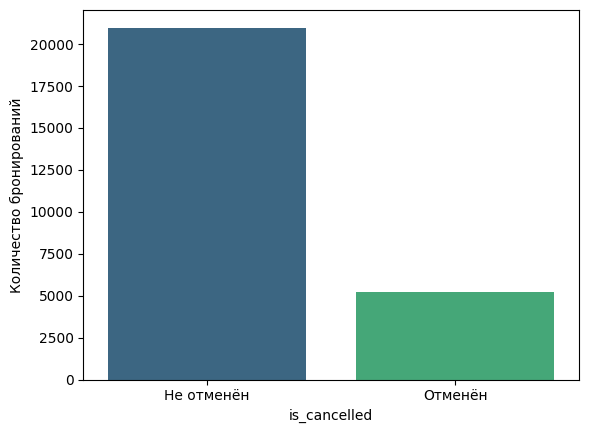

In [13]:
sns.countplot(x='is_cancelled', data=train, palette='viridis')
plt.ylabel('Количество бронирований')
plt.xticks(ticks=[0, 1], labels=['Не отменён', 'Отменён'])
plt.show()

In [14]:
pay_types = train['Способ оплаты'].unique()

<Axes: >

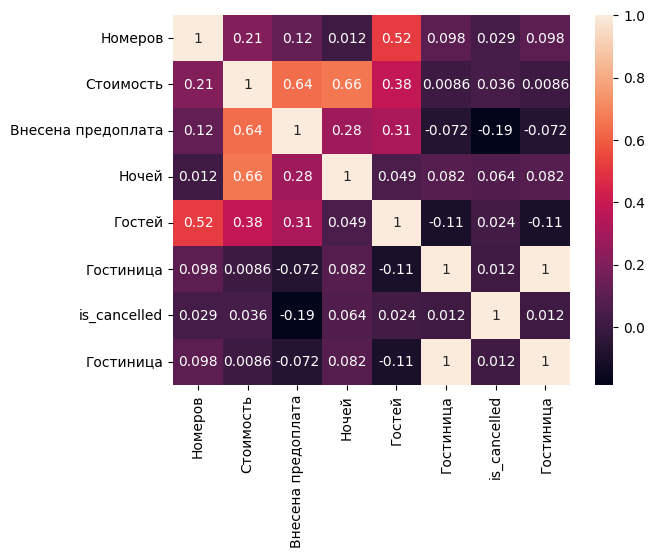

In [15]:
corr_df = train[['Номеров', 'Стоимость', 'Внесена предоплата', 'Ночей', 'Гостей', 'Гостиница', 'is_cancelled', 'Гостиница']].corr()
sns.heatmap(corr_df, annot=True)

Заметки по признакам на которые смотреть:
1. Внесена предоплата -> is_cancelled
2. В целом числовые признаки слабо влияют -> можно сказать, что надо смотреть в основном на категориальные

Предположения:
- Корреляция по разницы дат (оплата, заезд), .....?
- Корреляция по региону
- Корреляция по источникам бронирования

In [16]:
train['Разница_бронь_заезд_дней'] = abs((train['Заезд'] - train['Дата бронирования']).dt.days)
train

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница,is_cancelled,Разница_бронь_заезд_дней
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1,1,7
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1,0,23
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Активный,Номер «Студия»,2,4,0,19
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Активный,Номер «Стандарт»,1,3,0,9
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Активный,Номер «Люкс»,4,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,20230310-7492-177993190,1,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2023-01-07 17:45:18,NaT,2023-03-10 15:00:00,2,2023-03-12 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2,0,61
26170,20230625-16563-206126520,1,69600.0,23200,Банк. карта: Банк Россия (банк. карта),2023-06-20 17:54:17,NaT,2023-06-25 15:00:00,3,2023-06-28 12:00:00,Официальный сайт,Активный,Номер «Студия»,3,4,0,4
26171,20220624-7492-137587082,1,55600.0,13900,Банк. карта: Банк Россия (банк. карта),2022-05-08 19:24:05,NaT,2022-06-24 15:00:00,4,2022-06-28 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2,0,46
26172,20220427-7491-125459150,1,6300.0,0,Гарантия банковской картой,2022-02-19 09:55:50,2022-04-16 23:14:35,2022-04-27 15:00:00,1,2022-04-28 12:00:00,booking.com,Отмена,Номер «Стандарт»,2,3,1,67


In [17]:
train['Регион'] = train['Гостиница'].apply(lambda x: 1 if x in [1, 2] else 2)
train.groupby('Регион')['is_cancelled'].mean()

Регион
1    0.194562
2    0.204204
Name: is_cancelled, dtype: float64

In [18]:
train.groupby('Категория номера')['is_cancelled'].mean()

Категория номера
1. Апартаменты с 2 спальнями с отдельным входом\n2. Апартаменты с 2 спальнями с отдельным входом                                                     0.187500
1. Апартаменты с 2 спальнями с отдельным входом\n2. Апартаменты с 2 спальнями с отдельным входом\n3. Апартаменты с 2 спальнями с отдельным входом    0.333333
1. Апартаменты с 2 спальнями с отдельным входом\n2. Апартаменты с 2 спальнями с отдельным входом\n3. Номер «Стандарт»                                0.000000
1. Коттедж с 2 спальнями\n2. Коттедж с 2 спальнями                                                                                                   0.500000
1. Коттедж с 2 спальнями\n2. Коттедж с 2 спальнями\n3. Коттедж с 2 спальнями                                                                         1.000000
1. Коттедж с 2 спальнями\n2. Коттедж с 3 спальнями                                                                                                   0.600000
1. Коттедж с 3 спальнями\n2. Коттед

In [19]:
train.groupby('Источник')['is_cancelled'].mean()

Источник
101hotels.com                       0.625000
Acase.ru (ООО "АКАДЕМ-ОНЛАЙН")      0.066667
Acase.ru (ООО "КАЛЕЙДОСКОП")        0.000000
Acase.ru (ООО "ПРАНДИУМ")           0.235294
Alean.ru (03.02.2022-31.01.2023)    0.142857
Alean.ru (13.10.2023-02.06.2025)    1.000000
Alean.ru (16.01.2023-06.09.2024)    0.200000
Alean.ru (20.01.2021-31.01.2022)    1.000000
Alean.ru (31.10.2023-22.06.2025)    0.000000
Bronevik.com(new)                   0.234043
Bronevik.com/Bro.Online             0.285714
Cuva                                0.058824
OneTwoTrip                          0.184397
Otello                              0.000000
Ozon                                0.250000
Svoy Hotel                          0.000000
Zabroniryi.ru                       0.416667
booking.com                         0.359300
booking.com (Booking.com)           0.409756
expedia.com (A-Hotels.com)          0.200000
ostrovok.ru                         0.141883
Бронирование из экстранета          0.488515
В

In [20]:
def get_season(date):
    if date.month in [12, 1, 2]:
        return 1  # Зима
    elif date.month in [3, 4, 5]:
        return 2  # Весна
    elif date.month in [6, 7, 8]:
        return 3  # Лето
    elif date.month in [9, 10, 11]:
        return 4  # Осень
    
train['Сезон_бронирования'] = train['Дата бронирования'].apply(get_season)
train['Сезон_заезда'] = train['Заезд'].apply(get_season)

<Axes: >

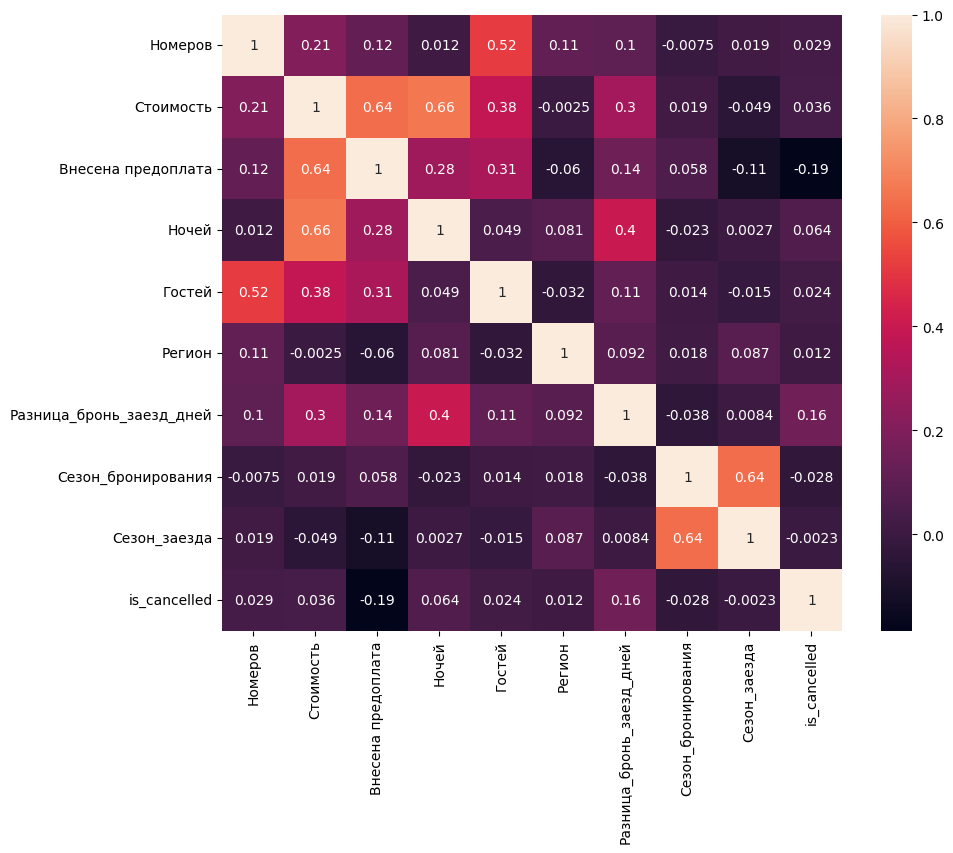

In [21]:
plt.figure(figsize=(10, 8))
corr_df = train[['Номеров', 'Стоимость', 'Внесена предоплата', 'Ночей', 'Гостей', 'Регион', 'Разница_бронь_заезд_дней', 'Сезон_бронирования', 'Сезон_заезда', 'is_cancelled']].corr()
sns.heatmap(corr_df, annot=True)

In [22]:
sources = {}
for source, num in enumerate(train['Источник'].unique()):
    sources[num] = source
train['Источник число'] = train['Источник'].replace(sources)
train

C:\Users\Wh1te\AppData\Local\Temp\ipykernel_92992\1349021206.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Источник число'] = train['Источник'].replace(sources)


,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,...,Статус брони,Категория номера,Гостей,Гостиница,is_cancelled,Разница_бронь_заезд_дней,Регион,Сезон_бронирования,Сезон_заезда,Источник число
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,...,Отмена,Номер «Стандарт»,2,1,1,7,1,2,2,0
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,...,Активный,Номер «Стандарт»,2,1,0,23,1,3,3,1
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,...,Активный,Номер «Студия»,2,4,0,19,2,4,1,1
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,...,Активный,Номер «Стандарт»,1,3,0,9,2,4,4,2
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2,2023-05-31 12:00:00,...,Активный,Номер «Люкс»,4,1,0,8,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,20230310-7492-177993190,1,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2023-01-07 17:45:18,NaT,2023-03-10 15:00:00,2,2023-03-12 12:00:00,...,Активный,Номер «Стандарт»,2,2,0,61,1,1,2,1
26170,20230625-16563-206126520,1,69600.0,23200,Банк. карта: Банк Россия (банк. карта),2023-06-20 17:54:17,NaT,2023-06-25 15:00:00,3,2023-06-28 12:00:00,...,Активный,Номер «Студия»,3,4,0,4,2,3,3,1
26171,20220624-7492-137587082,1,55600.0,13900,Банк. карта: Банк Россия (банк. карта),2022-05-08 19:24:05,NaT,2022-06-24 15:00:00,4,2022-06-28 12:00:00,...,Активный,Номер «Стандарт»,2,2,0,46,1,2,3,1
26172,20220427-7491-125459150,1,6300.0,0,Гарантия банковской картой,2022-02-19 09:55:50,2022-04-16 23:14:35,2022-04-27 15:00:00,1,2022-04-28 12:00:00,...,Отмена,Номер «Стандарт»,2,3,1,67,2,1,2,3


In [23]:
pay_methods = {}
for method, num in enumerate(train['Способ оплаты'].unique()):
    pay_methods[num] = method
train['Способ оплаты число'] = train['Способ оплаты'].replace(pay_methods)
train

C:\Users\Wh1te\AppData\Local\Temp\ipykernel_92992\3567268971.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Способ оплаты число'] = train['Способ оплаты'].replace(pay_methods)


,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,...,Категория номера,Гостей,Гостиница,is_cancelled,Разница_бронь_заезд_дней,Регион,Сезон_бронирования,Сезон_заезда,Источник число,Способ оплаты число
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,...,Номер «Стандарт»,2,1,1,7,1,2,2,0,0
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,...,Номер «Стандарт»,2,1,0,23,1,3,3,1,1
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,...,Номер «Студия»,2,4,0,19,2,4,1,1,2
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,...,Номер «Стандарт»,1,3,0,9,2,4,4,2,3
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2,2023-05-31 12:00:00,...,Номер «Люкс»,4,1,0,8,1,2,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,20230310-7492-177993190,1,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2023-01-07 17:45:18,NaT,2023-03-10 15:00:00,2,2023-03-12 12:00:00,...,Номер «Стандарт»,2,2,0,61,1,1,2,1,2
26170,20230625-16563-206126520,1,69600.0,23200,Банк. карта: Банк Россия (банк. карта),2023-06-20 17:54:17,NaT,2023-06-25 15:00:00,3,2023-06-28 12:00:00,...,Номер «Студия»,3,4,0,4,2,3,3,1,2
26171,20220624-7492-137587082,1,55600.0,13900,Банк. карта: Банк Россия (банк. карта),2022-05-08 19:24:05,NaT,2022-06-24 15:00:00,4,2022-06-28 12:00:00,...,Номер «Стандарт»,2,2,0,46,1,2,3,1,2
26172,20220427-7491-125459150,1,6300.0,0,Гарантия банковской картой,2022-02-19 09:55:50,2022-04-16 23:14:35,2022-04-27 15:00:00,1,2022-04-28 12:00:00,...,Номер «Стандарт»,2,3,1,67,2,1,2,3,5


### Models (RF and CatBoost)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

In [25]:
rf = RandomForestClassifier(random_state=42)

In [26]:
train['Дата бронирования'] = pd.to_datetime(train['Дата бронирования'])
train['Год бронирования'] = train['Дата бронирования'].dt.year
train['Месяц бронирования'] = train['Дата бронирования'].dt.month
train['День бронирования'] = train['Дата бронирования'].dt.day

In [27]:
statuses = {}
for status, num in enumerate(train['Статус брони'].unique()):
    statuses[num] = status
train['Статус брони число'] = train['Статус брони'].replace(statuses)
train

C:\Users\Wh1te\AppData\Local\Temp\ipykernel_92992\2573364954.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Статус брони число'] = train['Статус брони'].replace(statuses)


,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,...,Разница_бронь_заезд_дней,Регион,Сезон_бронирования,Сезон_заезда,Источник число,Способ оплаты число,Год бронирования,Месяц бронирования,День бронирования,Статус брони число
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,...,7,1,2,2,0,0,2023,4,20,0
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,...,23,1,3,3,1,1,2022,6,18,1
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,...,19,2,4,1,1,2,2022,11,14,1
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,...,9,2,4,4,2,3,2023,9,8,1
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2,2023-05-31 12:00:00,...,8,1,2,2,1,4,2023,5,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,20230310-7492-177993190,1,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2023-01-07 17:45:18,NaT,2023-03-10 15:00:00,2,2023-03-12 12:00:00,...,61,1,1,2,1,2,2023,1,7,1
26170,20230625-16563-206126520,1,69600.0,23200,Банк. карта: Банк Россия (банк. карта),2023-06-20 17:54:17,NaT,2023-06-25 15:00:00,3,2023-06-28 12:00:00,...,4,2,3,3,1,2,2023,6,20,1
26171,20220624-7492-137587082,1,55600.0,13900,Банк. карта: Банк Россия (банк. карта),2022-05-08 19:24:05,NaT,2022-06-24 15:00:00,4,2022-06-28 12:00:00,...,46,1,2,3,1,2,2022,5,8,1
26172,20220427-7491-125459150,1,6300.0,0,Гарантия банковской картой,2022-02-19 09:55:50,2022-04-16 23:14:35,2022-04-27 15:00:00,1,2022-04-28 12:00:00,...,67,2,1,2,3,5,2022,2,19,0


In [28]:
X = train[['Номеров', 'Стоимость', 'Внесена предоплата',
       'Год бронирования', 'Месяц бронирования',  'День бронирования', 
       'Ночей',
       'Гостей', 
       'Разница_бронь_заезд_дней',
       'Сезон_бронирования', 'Сезон_заезда', 'Источник число',
       'Способ оплаты число']]
y = train['is_cancelled']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_prob = rf.predict(X_test)

In [32]:
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc

0.7649196370375487

In [33]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [34]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
param_dist = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None] + list(np.arange(5, 51, 5).tolist()),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist,
                                       n_iter=50, cv=5, scoring='roc_auc', random_state=42, n_jobs=10)

random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_

print(f'Лучшие параметры RandomForest: {random_search_rf.best_params_}')
rf_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
print(f'ROC AUC для RandomForest: {rf_auc:.5f}')

grid_param_dist = {
    'n_estimators': [best_rf.n_estimators - 10, best_rf.n_estimators, best_rf.n_estimators + 10],
    'max_depth': [best_rf.max_depth - 5 if best_rf.max_depth is not None else None,
                  best_rf.max_depth,
                  best_rf.max_depth + 5],
    'min_samples_split': [best_rf.min_samples_split],
    'min_samples_leaf': [best_rf.min_samples_leaf],
}

grid_search_rf = GridSearchCV(rf, param_grid=grid_param_dist,
                               cv=5, scoring='roc_auc', n_jobs=10)

grid_search_rf.fit(X_train, y_train)
best_grid_rf = grid_search_rf.best_estimator_

grid_rf_auc = roc_auc_score(y_test, best_grid_rf.predict_proba(X_test)[:, 1])
print(f'ROC AUC для лучшего RandomForest из GridSearch: {grid_rf_auc:.5f}')

Лучшие параметры RandomForest: {'n_estimators': 160, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
ROC AUC для RandomForest: 0.86029
ROC AUC для лучшего RandomForest из GridSearch: 0.86036


In [35]:
test.head()

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Ночей,Выезд,Источник,Категория номера,Гостей,Гостиница
0,20231129-16563-238946689,1,23750.0,23750,Банк. карта: Банк Россия (банк. карта),2023-11-28 10:34:43,2023-11-29 15:00:00,2,2023-12-01 12:00:00,Официальный сайт,Номер «Студия»,3,4
1,20221219-7491-174959103,1,15010.0,7505,Банк. карта: Банк Россия (банк. карта),2022-12-12 18:30:43,2022-12-19 15:00:00,2,2022-12-21 12:00:00,Официальный сайт,Номер «Стандарт»,2,3
2,20221211-6634-172724329,1,8400.0,8400,Отложенная электронная оплата: Банк Россия (ба...,2022-11-25 22:03:59,2022-12-11 15:00:00,1,2022-12-12 12:00:00,Официальный сайт,Номер «Стандарт»,2,1
3,20230821-6634-212247350,1,42500.0,42500,Банк. карта: Банк Россия (банк. карта),2023-07-18 15:45:46,2023-08-21 15:00:00,3,2023-08-24 12:00:00,Официальный сайт,Апартаменты с 2 спальнями с отдельным входом,4,1
4,20230326-6634-189784563,1,62500.0,11900,Система быстрых платежей: Эквайринг ComfortBoo...,2023-03-23 11:04:13,2023-03-26 15:00:00,5,2023-03-31 12:00:00,Официальный сайт,Номер «Стандарт»,1,1


In [36]:
test_preprocessed = test[['Номеров', 'Стоимость', 'Внесена предоплата',
                          
                          'Ночей',
                          
                          'Гостей',
                          ]]

test_preprocessed['Год бронирования'] = test['Дата бронирования'].dt.year
test_preprocessed['Месяц бронирования'] = test['Дата бронирования'].dt.month
test_preprocessed['День бронирования'] = test['Дата бронирования'].dt.day
test_preprocessed['Источник число'] = test['Источник'].replace(sources)
test_preprocessed['Способ оплаты число'] = test['Способ оплаты'].replace(pay_methods)
test_preprocessed['Разница_бронь_заезд_дней'] = abs((test['Заезд'] - test['Дата бронирования']).dt.days)
test_preprocessed['Сезон_бронирования'] = test['Дата бронирования'].apply(get_season)
test_preprocessed['Сезон_заезда'] = test['Заезд'].apply(get_season)

C:\Users\Wh1te\AppData\Local\Temp\ipykernel_92992\4032225546.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_preprocessed['Год бронирования'] = test['Дата бронирования'].dt.year
C:\Users\Wh1te\AppData\Local\Temp\ipykernel_92992\4032225546.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_preprocessed['Месяц бронирования'] = test['Дата бронирования'].dt.month
C:\Users\Wh1te\AppData\Local\Temp\ipykernel_92992\4032225546.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [37]:
test_preprocessed.columns

Index(['Номеров', 'Стоимость', 'Внесена предоплата', 'Ночей', 'Гостей',
       'Год бронирования', 'Месяц бронирования', 'День бронирования',
       'Источник число', 'Способ оплаты число', 'Разница_бронь_заезд_дней',
       'Сезон_бронирования', 'Сезон_заезда'],
      dtype='object')

In [38]:
test_preprocessed = test_preprocessed[X_train.columns]

In [39]:
y_prob_to_load = best_grid_rf.predict(test_preprocessed)

In [40]:
for i in range(len(y_prob_to_load)):
    print(i, y_prob_to_load[i])

0 0
1 0
2 0
3 0
4 0
5 0
6 1
7 0
8 0
9 0
10 0
11 0
12 1
13 0
14 0
15 0
16 1
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 1
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 1
63 0
64 0
65 0
66 1
67 0
68 0
69 0
70 0
71 1
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 1
97 0
98 1
99 0
100 0
101 0
102 1
103 0
104 0
105 0
106 0
107 0
108 0
109 1
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 1
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 1
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 1
166 1
167 0
168 1
169 0
170 0
171 0
172 1
173 0
174 0
175 0
176 0
177 0
178 0
179 0
180 0
181 0
182 0
183 0
184 1


In [41]:
export = pd.DataFrame(y_prob_to_load)
export.to_csv('output_1.csv', index=False, header=None)

In [42]:
from catboost import CatBoostClassifier, Pool

In [43]:
catboost_model = CatBoostClassifier(
    iterations=2,
    depth=2,
    learning_rate=1,
    loss_function='Logloss',
    verbose=True
)

In [44]:
catboost_data = train[['Номеров', 'Стоимость', 'Внесена предоплата',
                        'Способ оплаты', 'Заезд', 'Ночей',
                        'Выезд', 'Гостей', 'Гостиница',
                        'Разница_бронь_заезд_дней',
                        'Сезон_бронирования', 'Сезон_заезда',
                        'Год бронирования', 'Месяц бронирования',
                        'День бронирования',
                        'Категория номера', 'Источник']]

text_features = ['Способ оплаты', 'Категория номера', 'Источник']
label = train['is_cancelled']

In [45]:
train_pool = Pool(data=catboost_data, text_features=text_features, label=label)

In [46]:
loss_functions = [
    'Logloss',         # Logistic regression loss
    'CrossEntropy']    # Cross-entropy loss'

for loss_function in loss_functions:
    print(f'Training model with loss function: {loss_function}')
    
    catboost_model = CatBoostClassifier(
        iterations=100,          
        depth=3,                 
        learning_rate=0.1,
        loss_function=loss_function,
        verbose=True
    )
    catboost_model.fit(train_pool, plot=True)

Training model with loss function: Logloss


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5992037	total: 57ms	remaining: 5.64s
1:	learn: 0.5250897	total: 61.8ms	remaining: 3.03s
2:	learn: 0.4711522	total: 66.3ms	remaining: 2.14s
3:	learn: 0.4373309	total: 70ms	remaining: 1.68s
4:	learn: 0.4074099	total: 73.5ms	remaining: 1.4s
5:	learn: 0.3877793	total: 77.2ms	remaining: 1.21s
6:	learn: 0.3690713	total: 80.9ms	remaining: 1.07s
7:	learn: 0.3575383	total: 84.7ms	remaining: 975ms
8:	learn: 0.3457428	total: 88.4ms	remaining: 894ms
9:	learn: 0.3378350	total: 91.8ms	remaining: 826ms
10:	learn: 0.3307051	total: 95.2ms	remaining: 770ms
11:	learn: 0.3262801	total: 98.4ms	remaining: 722ms
12:	learn: 0.3216351	total: 102ms	remaining: 683ms
13:	learn: 0.3194892	total: 106ms	remaining: 648ms
14:	learn: 0.3151534	total: 109ms	remaining: 618ms
15:	learn: 0.3125978	total: 112ms	remaining: 588ms
16:	learn: 0.3104158	total: 116ms	remaining: 564ms
17:	learn: 0.3088219	total: 119ms	remaining: 543ms
18:	learn: 0.3068469	total: 123ms	remaining: 524ms
19:	learn: 0.3056382	total: 126ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5992037	total: 4.55ms	remaining: 450ms
1:	learn: 0.5250897	total: 8.31ms	remaining: 407ms
2:	learn: 0.4711522	total: 12.1ms	remaining: 391ms
3:	learn: 0.4373309	total: 15.8ms	remaining: 379ms
4:	learn: 0.4074099	total: 19.3ms	remaining: 368ms
5:	learn: 0.3877793	total: 23.2ms	remaining: 363ms
6:	learn: 0.3690713	total: 27ms	remaining: 358ms
7:	learn: 0.3575383	total: 30.8ms	remaining: 354ms
8:	learn: 0.3457428	total: 34.5ms	remaining: 349ms
9:	learn: 0.3378350	total: 37.8ms	remaining: 340ms
10:	learn: 0.3307051	total: 41.3ms	remaining: 334ms
11:	learn: 0.3262801	total: 44.7ms	remaining: 328ms
12:	learn: 0.3216351	total: 48.6ms	remaining: 326ms
13:	learn: 0.3194892	total: 52.5ms	remaining: 322ms
14:	learn: 0.3151534	total: 56ms	remaining: 317ms
15:	learn: 0.3125978	total: 59.4ms	remaining: 312ms
16:	learn: 0.3104158	total: 62.9ms	remaining: 307ms
17:	learn: 0.3088219	total: 67.1ms	remaining: 306ms
18:	learn: 0.3068469	total: 71.1ms	remaining: 303ms
19:	learn: 0.3056382	total

In [47]:
test_cat = test[['Номеров', 'Стоимость', 'Внесена предоплата',
                  'Способ оплаты', 'Категория номера', 'Источник',
                  'Ночей', 'Гостей', 'Заезд', 'Выезд', 'Гостиница']]

test_cat['Год бронирования'] = test['Дата бронирования'].dt.year
test_cat['Месяц бронирования'] = test['Дата бронирования'].dt.month
test_cat['День бронирования'] = test['Дата бронирования'].dt.day
test_cat['Разница_бронь_заезд_дней'] = abs((test['Заезд'] - test['Дата бронирования']).dt.days)
test_cat['Сезон_бронирования'] = test['Дата бронирования'].apply(get_season)
test_cat['Сезон_заезда'] = test['Заезд'].apply(get_season)

test_cat = test_cat[catboost_data.columns]

C:\Users\Wh1te\AppData\Local\Temp\ipykernel_92992\1612777323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cat['Год бронирования'] = test['Дата бронирования'].dt.year


In [48]:
test_pool = Pool(test_cat, text_features=text_features)
predicts_catboost = catboost_model.predict(test_pool)

In [49]:
export = pd.DataFrame(predicts_catboost)
export.to_csv('output_2.csv', index=False, header=None)

In [50]:
e1, e2 = pd.read_csv('output_1.csv'), pd.read_csv('output_2.csv')
roc_auc_score(e1, e2)

0.987949795915922

### EDA continues...

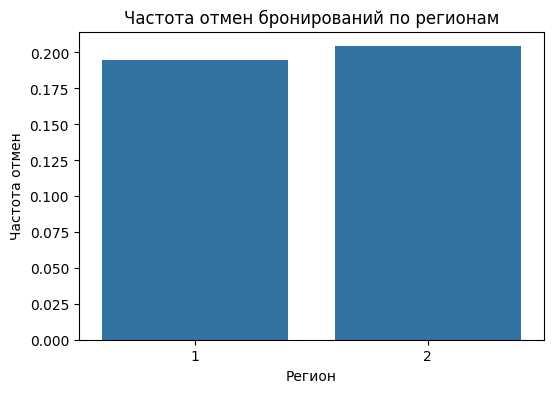

In [51]:
cancel_rate_region = train.groupby('Регион')['is_cancelled'].mean().reset_index()
cancel_rate_region
plt.figure(figsize=(6, 4))
sns.barplot(x='Регион', y='is_cancelled', data=cancel_rate_region)
plt.title('Частота отмен бронирований по регионам')
plt.ylabel('Частота отмен')
plt.xlabel('Регион')
plt.show()

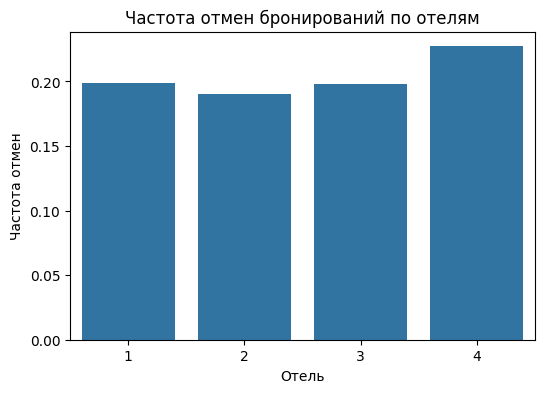

In [52]:
cancel_rate_hotel = train.groupby('Гостиница')['is_cancelled'].mean().reset_index()
cancel_rate_hotel
plt.figure(figsize=(6, 4))
sns.barplot(x='Гостиница', y='is_cancelled', data=cancel_rate_hotel)
plt.title('Частота отмен бронирований по отелям')
plt.ylabel('Частота отмен')
plt.xlabel('Отель')
plt.show()

In [53]:
from scipy.stats import ttest_ind, chi2_contingency

In [54]:
region_1 = train[train['Регион'] == 1]['is_cancelled']
region_2 = train[train['Регион'] == 2]['is_cancelled']

t_stat, p_value = ttest_ind(region_1, region_2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -1.9119302680415102, P-value: 0.05589604581105034


In [55]:
contingency_table = pd.crosstab(train['Регион'], train['is_cancelled'])
chi2_stat, chi2_p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2_stat}, P-value: {chi2_p}")

Chi-square statistic: 3.594860127854325, P-value: 0.05795850575489509


In [56]:
if p_value < 0.05 or chi2_p < 0.05:
    print(True)
else:
    print(False)

False


T-statistic 
- Отрицательное значение указывает на то, что в среднем отмены бронирований в первом регионе меньше, чем во втором.
P-value = 0.0559
- Это близко к порогу значимости, но чуть выше 0.05 --> значит мы не можем с уверенностью утверждать о статистически значимой разнице в частоте отмен между регионами по t-test. Но результат находится на грани
<br/><br/>
Chi-square test
- P-value = 0.0580, что также немного выше порога значимости 0.05 --> на уровне 5% значимости мы не можем утверждать о зависимости между регионом и фактом отмены.
Однако, как и в случае с t-test, значение близко к значимому порогу, что может указывать на наличие слабой зависимости.

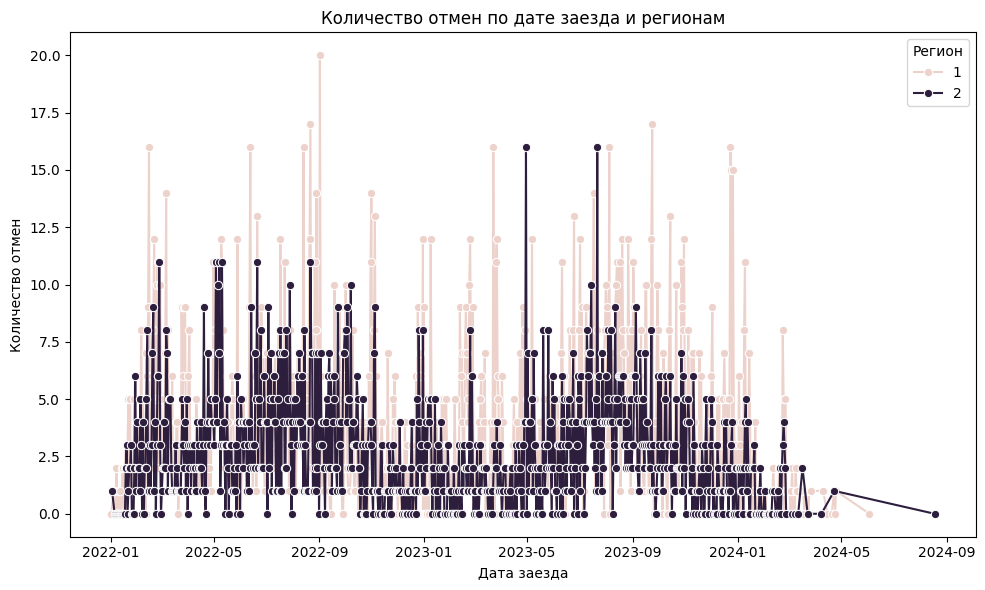

In [57]:
region_date_of_arrival = train.groupby(['Заезд', 'Регион'])['is_cancelled'].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(x='Заезд', y='is_cancelled', hue='Регион', data=region_date_of_arrival, marker='o')

plt.title('Количество отмен по дате заезда и регионам')
plt.xlabel('Дата заезда')
plt.ylabel('Количество отмен')
# plt.xticks(rotation=45)
plt.tight_layout()

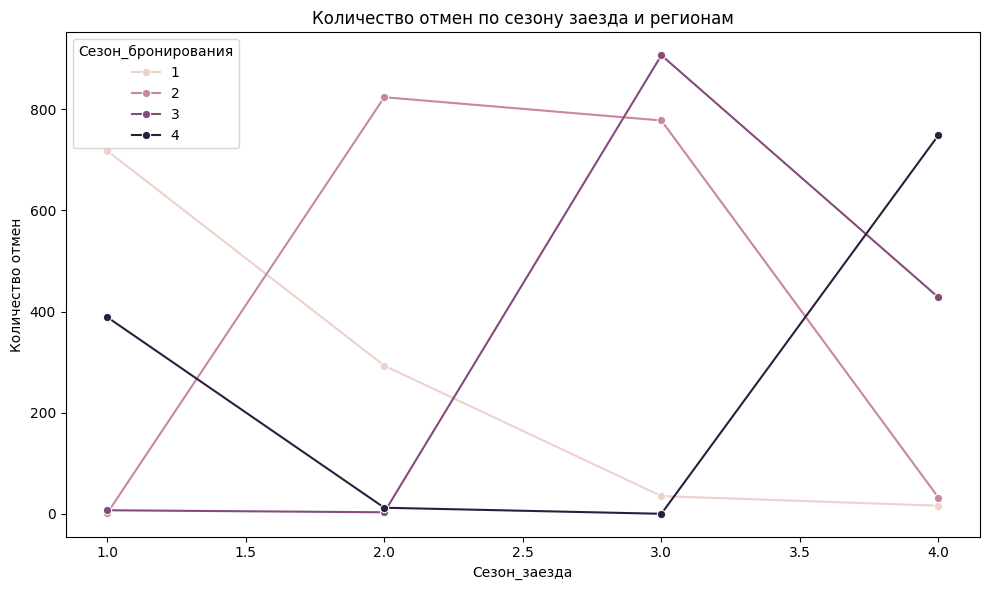

In [58]:
region_season_of_arrival = train.groupby(['Сезон_заезда', 'Сезон_бронирования'])['is_cancelled'].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(x='Сезон_заезда', y='is_cancelled', hue='Сезон_бронирования', data=region_season_of_arrival, marker='o')

plt.title('Количество отмен по сезону заезда и регионам')
plt.xlabel('Сезон_заезда')
plt.ylabel('Количество отмен')
# plt.xticks(rotation=45)
plt.tight_layout()

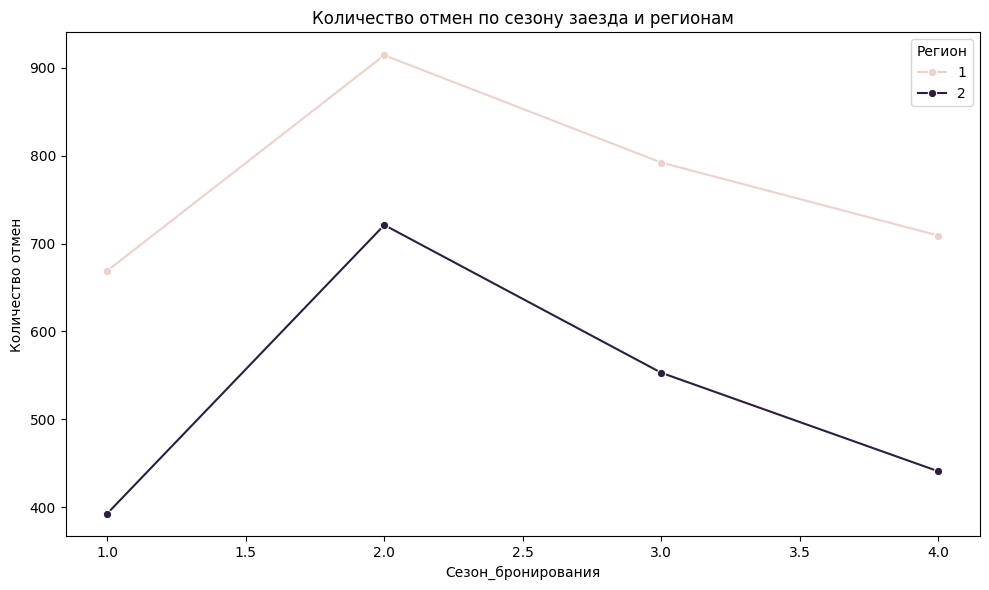

In [59]:
region_season_of_arrival = train.groupby(['Сезон_бронирования', 'Регион'])['is_cancelled'].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(x='Сезон_бронирования', y='is_cancelled', hue='Регион', data=region_season_of_arrival, marker='o')

plt.title('Количество отмен по сезону заезда и регионам')
plt.xlabel('Сезон_бронирования')
plt.ylabel('Количество отмен')
# plt.xticks(rotation=45)
plt.tight_layout()

In [60]:
train[['Сезон_бронирования', 'Заезд', 'is_cancelled']].corr()

,Сезон_бронирования,Заезд,is_cancelled
Сезон_бронирования,1.000000,0.395441,-0.028213
Заезд,0.395441,1.000000,-0.002065
is_cancelled,-0.028213,-0.002065,1.000000


In [61]:
def get_season_name(date):
    if date.month in [12, 1, 2]:
        return 'Зима'  # Зима
    elif date.month in [3, 4, 5]:
        return 'Весна'  # Весна
    elif date.month in [6, 7, 8]:
        return 'Лето'  # Лето
    elif date.month in [9, 10, 11]:
        return 'Осень'  # Осень
    
train['Сезон_бронирования_название'] = train['Дата бронирования'].apply(get_season_name)
train['Сезон_заезда_название'] = train['Заезд'].apply(get_season_name)

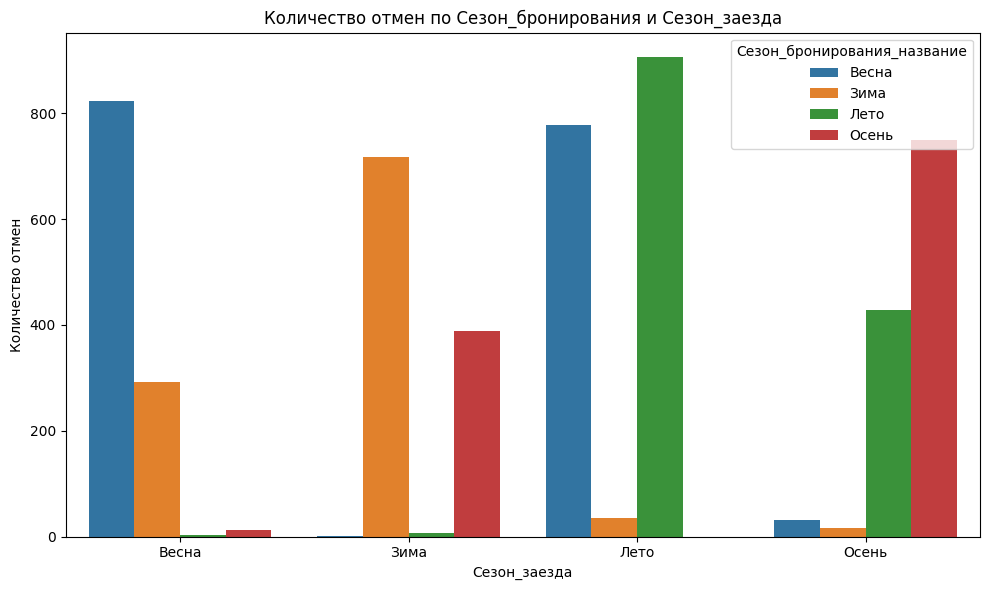

In [62]:
region_date_of_arrival = train.groupby(['Сезон_бронирования_название', 'Сезон_заезда_название'])['is_cancelled'].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x='Сезон_заезда_название', y='is_cancelled', hue='Сезон_бронирования_название', data=region_date_of_arrival)

plt.title('Количество отмен по Сезон_бронирования и Сезон_заезда')
plt.xlabel('Сезон_заезда')
plt.ylabel('Количество отмен')
# plt.xticks(rotation=45)
plt.tight_layout()

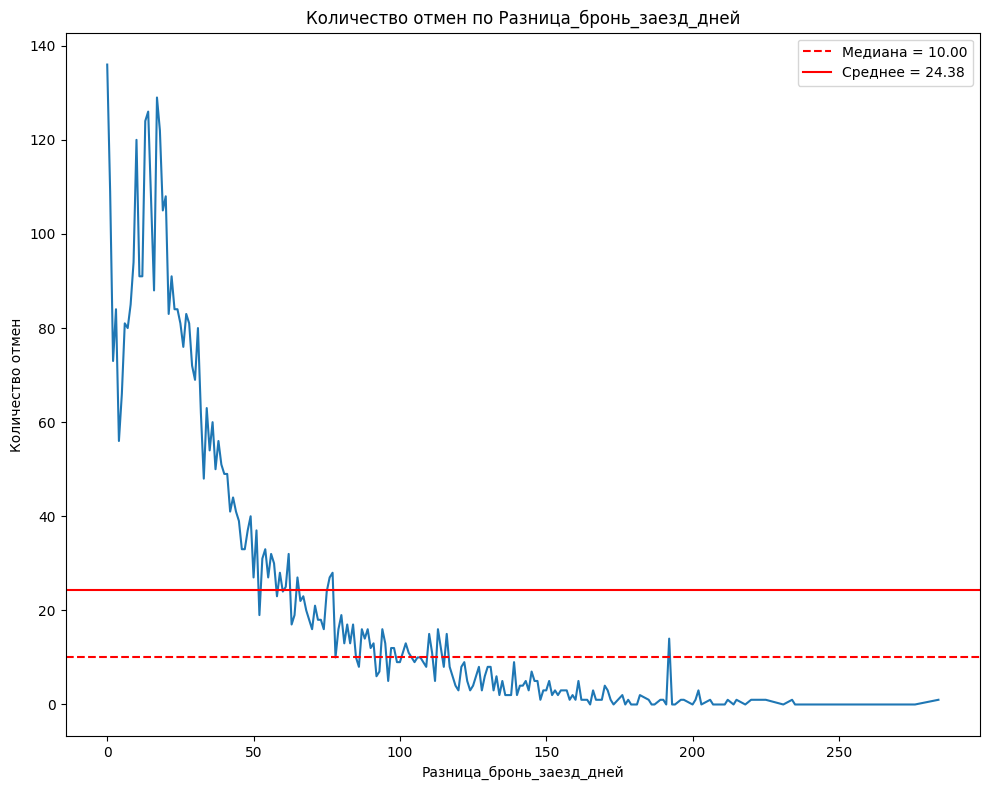

In [63]:
is_cancelled_diff_boook_arrival = train.groupby(['Разница_бронь_заезд_дней'])['is_cancelled'].sum().reset_index()

plt.figure(figsize=(10, 8))

sns.lineplot(x='Разница_бронь_заезд_дней', y='is_cancelled', data=is_cancelled_diff_boook_arrival)
med = is_cancelled_diff_boook_arrival['is_cancelled'].median()
mean = is_cancelled_diff_boook_arrival['is_cancelled'].mean()
plt.axhline(y = med, color='red', linestyle='--', label=f'Медиана = {med:.2f}')
plt.axhline(y = mean, color='red', label=f'Среднее = {mean:.2f}')
plt.title('Количество отмен по Разница_бронь_заезд_дней')
plt.xlabel('Разница_бронь_заезд_дней')
plt.ylabel('Количество отмен')
# plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

In [64]:
train.columns

Index(['№ брони', 'Номеров', 'Стоимость', 'Внесена предоплата',
       'Способ оплаты', 'Дата бронирования', 'Дата отмены', 'Заезд', 'Ночей',
       'Выезд', 'Источник', 'Статус брони', 'Категория номера', 'Гостей',
       'Гостиница', 'is_cancelled', 'Разница_бронь_заезд_дней', 'Регион',
       'Сезон_бронирования', 'Сезон_заезда', 'Источник число',
       'Способ оплаты число', 'Год бронирования', 'Месяц бронирования',
       'День бронирования', 'Статус брони число',
       'Сезон_бронирования_название', 'Сезон_заезда_название'],
      dtype='object')

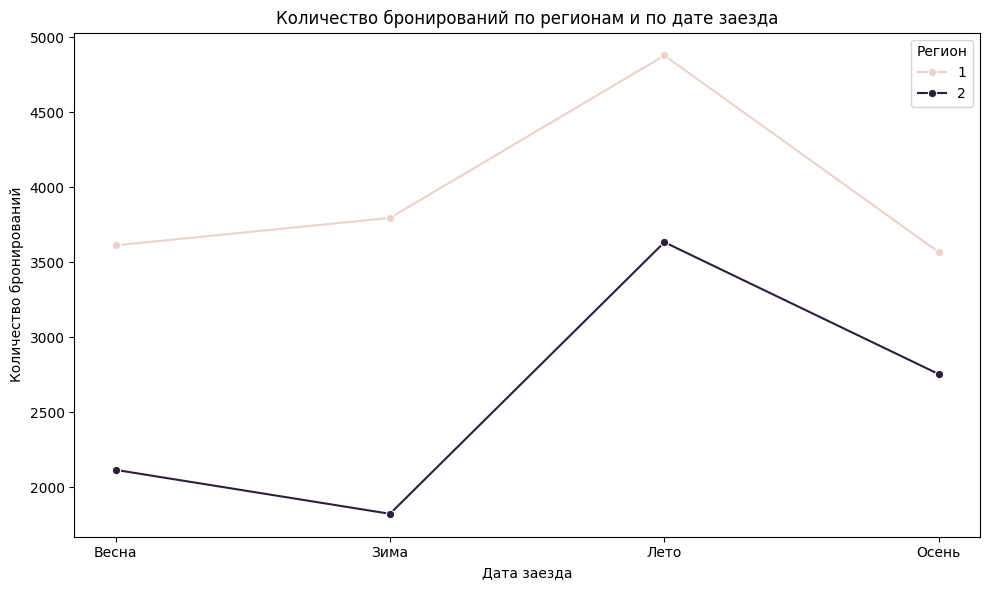

In [65]:
season_arrival_region = train.groupby(['Регион', 'Сезон_заезда_название']).size().reset_index(name='Количество бронирований')

plt.figure(figsize=(10, 6))

sns.lineplot(data=season_arrival_region, x='Сезон_заезда_название', y='Количество бронирований', hue='Регион', marker='o')
plt.title('Количество бронирований по регионам и по дате заезда')
plt.xlabel('Дата заезда')
plt.ylabel('Количество бронирований')

plt.legend(title='Регион')
plt.tight_layout()
plt.show()

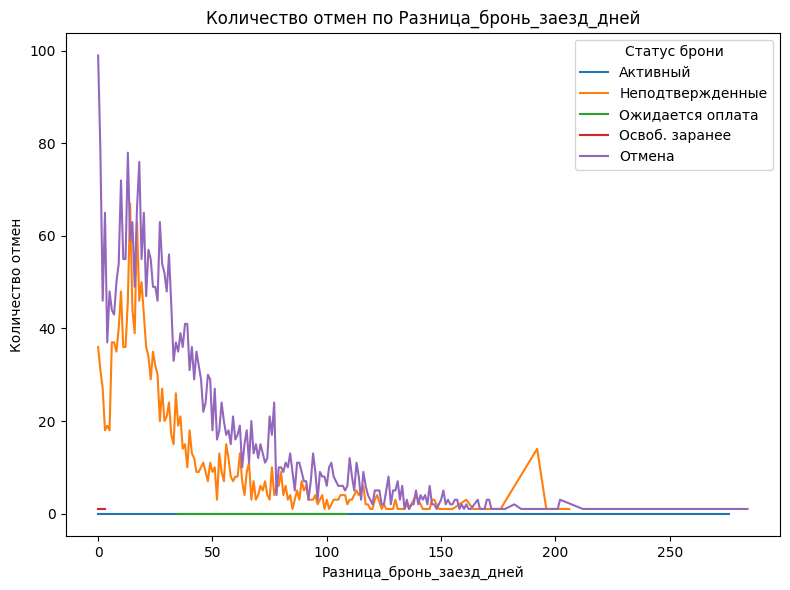

In [66]:
is_cancelled_status = train.groupby(['Статус брони', 'Разница_бронь_заезд_дней'])['is_cancelled'].sum().reset_index()
plt.figure(figsize=(8, 6))

sns.lineplot(x='Разница_бронь_заезд_дней', y='is_cancelled', hue='Статус брони', data=is_cancelled_status)

plt.title('Количество отмен по Разница_бронь_заезд_дней')
plt.xlabel('Разница_бронь_заезд_дней')
plt.ylabel('Количество отмен')
plt.tight_layout()

In [67]:
train.columns

Index(['№ брони', 'Номеров', 'Стоимость', 'Внесена предоплата',
       'Способ оплаты', 'Дата бронирования', 'Дата отмены', 'Заезд', 'Ночей',
       'Выезд', 'Источник', 'Статус брони', 'Категория номера', 'Гостей',
       'Гостиница', 'is_cancelled', 'Разница_бронь_заезд_дней', 'Регион',
       'Сезон_бронирования', 'Сезон_заезда', 'Источник число',
       'Способ оплаты число', 'Год бронирования', 'Месяц бронирования',
       'День бронирования', 'Статус брони число',
       'Сезон_бронирования_название', 'Сезон_заезда_название'],
      dtype='object')

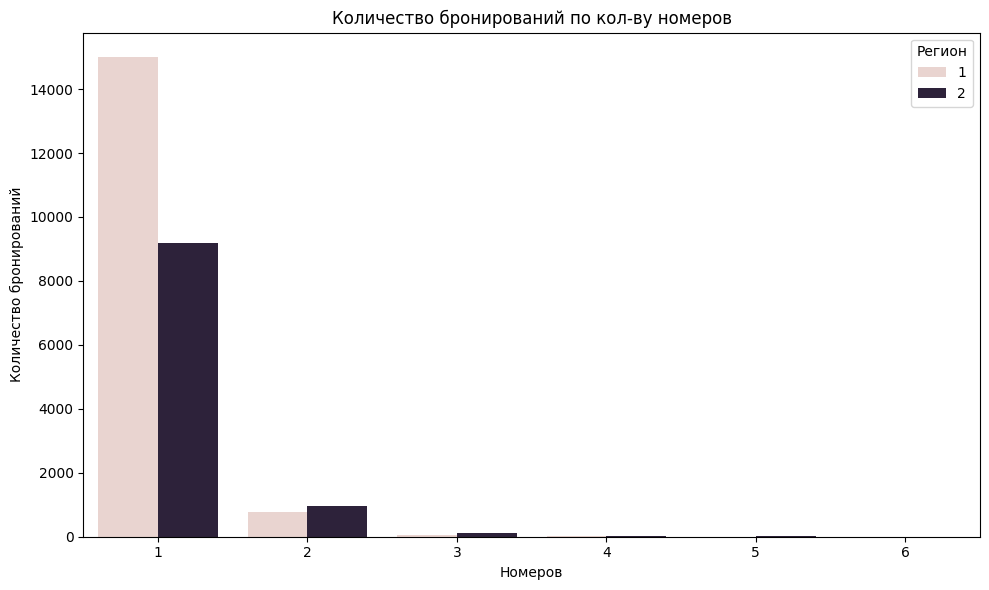

In [68]:
region_room = train.groupby(['Регион', 'Номеров']).size().reset_index(name='Количество бронирований')

plt.figure(figsize=(10, 6))

sns.barplot(data=region_room, x='Номеров', y='Количество бронирований', hue='Регион')
plt.title('Количество бронирований по кол-ву номеров')
plt.xlabel('Номеров')
plt.ylabel('Количество бронирований')

plt.legend(title='Регион')
plt.tight_layout()
plt.show()

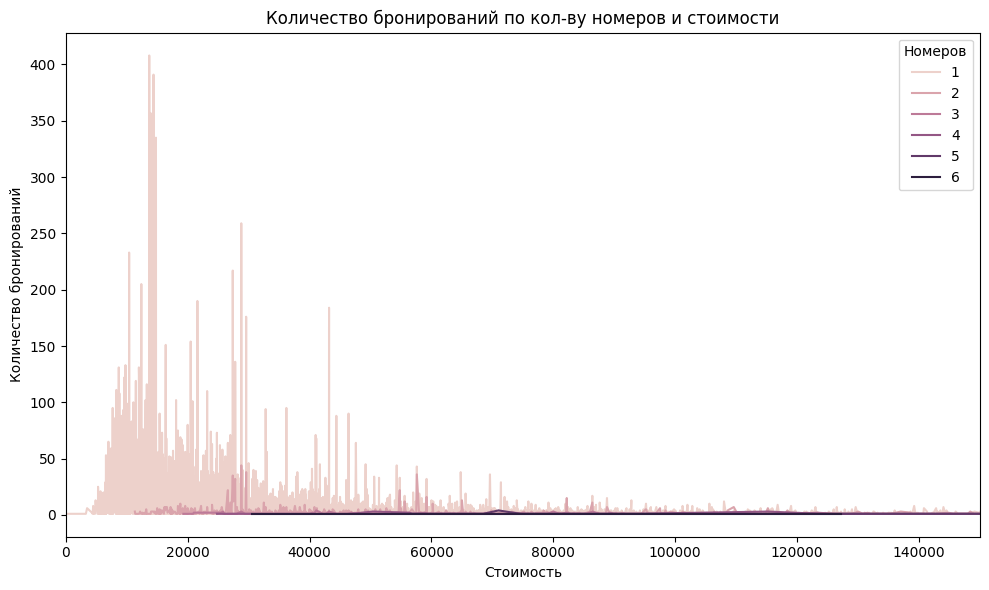

In [69]:
region_room = train.groupby(['Стоимость', 'Номеров']).size().reset_index(name='Количество бронирований')

plt.figure(figsize=(10, 6))


sns.lineplot(data=region_room, x='Стоимость', y='Количество бронирований', hue='Номеров')
# xticks_ = [10000, 50000, 100000, 200000, 500000, 1000000]
# plt.xticks(ticks=np.arange(0,1000000,500), labels=[f'{x}$' for x in xticks_])
plt.title('Количество бронирований по кол-ву номеров и стоимости')
plt.xlabel('Стоимость')
plt.xlim(0, 150000)

plt.ylabel('Количество бронирований')
plt.tight_layout()
plt.legend(title='Номеров')
plt.tight_layout()
plt.show()

### ML

In [70]:
import xgboost as xgb

In [71]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [75]:
param_dist_xgb = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None] + list(np.arange(5, 51, 5)),
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_dist_xgb, 
                                        n_iter=50, cv=5, scoring='roc_auc', 
                                        random_state=42, n_jobs=2, return_train_score=True)

random_search_xgb.fit(X_train, y_train)

best_xgb = random_search_xgb.best_estimator_
print(f'Лучшие параметры XGBoost: {random_search_xgb.best_params_}')

xgb_auc = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])
print(f'ROC AUC для XGBoost: {xgb_auc:.5f}')

Лучшие параметры XGBoost: {'subsample': 0.8, 'n_estimators': 40, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
ROC AUC для XGBoost: 0.86067


d:\da_practice\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:56:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


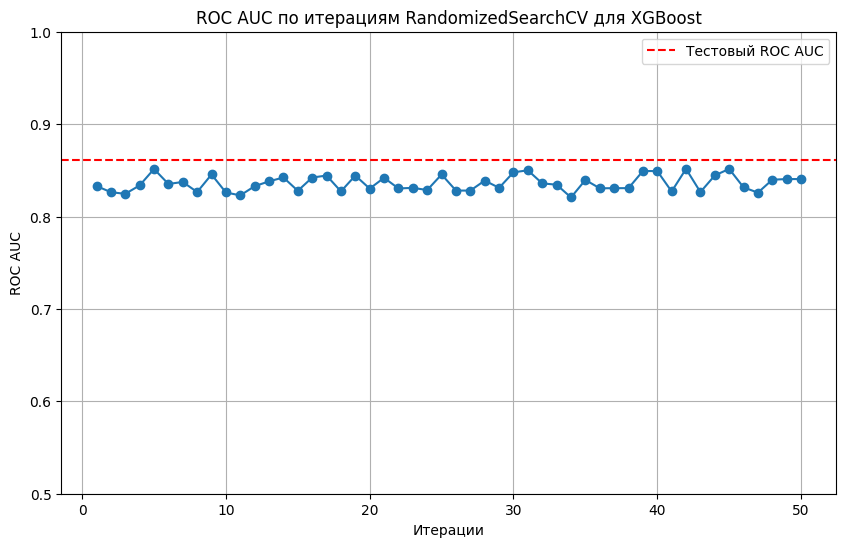

In [76]:
n_iterations = random_search_xgb.cv_results_['mean_test_score']
iterations = np.arange(1, len(n_iterations) + 1)

plt.figure(figsize=(10, 6))
plt.plot(iterations, n_iterations, marker='o')
plt.title('ROC AUC по итерациям RandomizedSearchCV для XGBoost')
plt.xlabel('Итерации')
plt.ylabel('ROC AUC')
plt.grid()
plt.ylim(0.5, 1.0)  # Измените полосы по вашему усмотрению
plt.axhline(y=xgb_auc, color='r', linestyle='--', label='Тестовый ROC AUC')
plt.legend()
plt.show()

In [78]:
grid_param_dist_xgb = {
    'n_estimators': [best_xgb.n_estimators - 10, best_xgb.n_estimators, best_xgb.n_estimators + 10],
    'max_depth': [best_xgb.max_depth - 5 if best_xgb.max_depth is not None else None,
                  best_xgb.max_depth,
                  best_xgb.max_depth + 5],
    'learning_rate': [best_xgb.learning_rate],
    'subsample': [best_xgb.subsample],
    'colsample_bytree': [best_xgb.colsample_bytree]
}
grid_search_xgb = GridSearchCV(xgb_model, param_grid=grid_param_dist_xgb,
                                cv=5, scoring='roc_auc', n_jobs=2)

grid_search_xgb.fit(X_train, y_train)

best_grid_xgb = grid_search_xgb.best_estimator_

# Оценка ROC AUC для лучшего grid
grid_xgb_auc = roc_auc_score(y_test, best_grid_xgb.predict_proba(X_test)[:, 1])
print(f'ROC AUC для лучшего XGBoost из GridSearch: {grid_xgb_auc:.5f}')

ROC AUC для лучшего XGBoost из GridSearch: 0.86181


d:\da_practice\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:57:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [79]:
y_prob_to_load_xgb = best_grid_xgb.predict(test_preprocessed)

In [226]:
export = pd.DataFrame(y_prob_to_load_xgb)
export.to_csv('output_3.csv', index=False, header=None)

In [229]:
e = pd.read_csv('output_3.csv')

In [80]:
roc_auc_score(y_prob_to_load, y_prob_to_load_xgb)

0.9913081408484261

Предварительный выбор: лучший и самый простой это RF, XGB и CATB дали почти такие же результаты как и он

In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
# Проверка первоначального распределения классов
print("Распределение классов в обучающей выборке (до SMOTE):")
print(pd.Series(y_train).value_counts())

# Балансировка классов с помощью SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Проверка распределения классов после SMOTE
print("Распределение классов в обучающей выборке (после SMOTE):")
print(pd.Series(y_resampled).value_counts())

Распределение классов в обучающей выборке (до SMOTE):
is_cancelled
0    14017
1     3519
Name: count, dtype: int64
Распределение классов в обучающей выборке (после SMOTE):
is_cancelled
0    14017
1    14017
Name: count, dtype: int64


In [83]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
param_dist = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None] + list(np.arange(5, 51, 5).tolist()),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist,
                                       n_iter=50, cv=5, scoring='roc_auc', random_state=42, n_jobs=10)

random_search_rf.fit(X_resampled, y_resampled)
best_rf = random_search_rf.best_estimator_

print(f'Лучшие параметры RandomForest: {random_search_rf.best_params_}')
rf_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
print(f'ROC AUC для RandomForest: {rf_auc:.5f}')

grid_param_dist = {
    'n_estimators': [best_rf.n_estimators - 10, best_rf.n_estimators, best_rf.n_estimators + 10],
    'max_depth': [best_rf.max_depth - 5 if best_rf.max_depth is not None else None,
                  best_rf.max_depth,
                  best_rf.max_depth + 5],
    'min_samples_split': [best_rf.min_samples_split],
    'min_samples_leaf': [best_rf.min_samples_leaf],
}

grid_search_rf = GridSearchCV(rf, param_grid=grid_param_dist,
                               cv=5, scoring='roc_auc', n_jobs=10)

grid_search_rf.fit(X_resampled, y_resampled)
best_grid_rf = grid_search_rf.best_estimator_

grid_rf_auc = roc_auc_score(y_test, best_grid_rf.predict_proba(X_test)[:, 1])
print(f'ROC AUC для лучшего RandomForest из GridSearch: {grid_rf_auc:.5f}')

KeyboardInterrupt: 

In [90]:
y_prob_to_load_RF_after_smote = best_grid_rf.predict(test_preprocessed)

In [240]:
roc_auc_score(y_prob_to_load_RF_after_smote, y_prob_to_load_xgb)

0.8236547263233492

In [241]:
export = pd.DataFrame(y_prob_to_load_RF_after_smote)
export.to_csv('output_4.csv', index=False, header=None)

d:\da_practice\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:57:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\da_practice\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:57:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\da_practice\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:57:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\da_practice\.venv\Lib\site-packages\xgboost\core.py:

Лучшие параметры XGBoost: {'subsample': 0.8, 'n_estimators': 180, 'max_depth': 70, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
ROC AUC для XGBoost: 0.84010


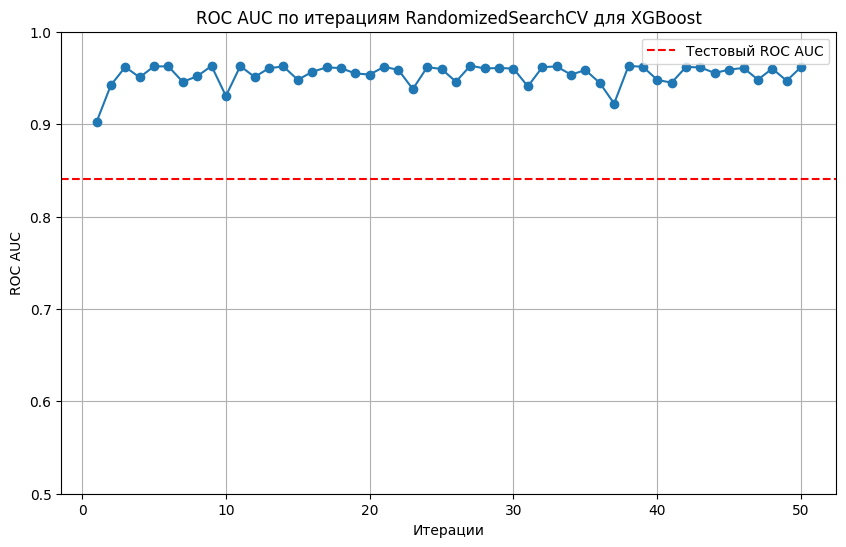

In [84]:
xgb_model_AFTER_SMOTE = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_dist_xgb = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None] + list(np.arange(5, 105, 5)),
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search_xgb = RandomizedSearchCV(xgb_model_AFTER_SMOTE, param_distributions=param_dist_xgb, 
                                        n_iter=50, cv=5, scoring='roc_auc', 
                                        random_state=42, n_jobs=1, return_train_score=True)

random_search_xgb.fit(X_resampled, y_resampled)

best_xgb = random_search_xgb.best_estimator_
print(f'Лучшие параметры XGBoost: {random_search_xgb.best_params_}')

xgb_auc = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])
print(f'ROC AUC для XGBoost: {xgb_auc:.5f}')
n_iterations = random_search_xgb.cv_results_['mean_test_score']
iterations = np.arange(1, len(n_iterations) + 1)

plt.figure(figsize=(10, 6))
plt.plot(iterations, n_iterations, marker='o')
plt.title('ROC AUC по итерациям RandomizedSearchCV для XGBoost')
plt.xlabel('Итерации')
plt.ylabel('ROC AUC')
plt.grid()
plt.ylim(0.5, 1.0)  # Измените полосы по вашему усмотрению
plt.axhline(y=xgb_auc, color='r', linestyle='--', label='Тестовый ROC AUC')
plt.legend()
plt.show()

In [87]:
grid_param_dist_xgb = {
    'n_estimators': [best_xgb.n_estimators - 10, best_xgb.n_estimators, best_xgb.n_estimators + 10],
    'max_depth': [best_xgb.max_depth - 5 if best_xgb.max_depth is not None else None,
                  best_xgb.max_depth,
                  best_xgb.max_depth + 5],
    'learning_rate': [best_xgb.learning_rate],
    'subsample': [best_xgb.subsample],
    'colsample_bytree': [best_xgb.colsample_bytree]
}
grid_search_xgb = GridSearchCV(xgb_model_AFTER_SMOTE, param_grid=grid_param_dist_xgb,
                                cv=5, scoring='roc_auc', n_jobs=1)

grid_search_xgb.fit(X_resampled, y_resampled)

best_grid_xgb = grid_search_xgb.best_estimator_

# Оценка ROC AUC для лучшего grid
grid_xgb_auc = roc_auc_score(y_test, best_grid_xgb.predict_proba(X_test)[:, 1])
print(f'ROC AUC для лучшего XGBoost из GridSearch: {grid_xgb_auc:.5f}')

d:\da_practice\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:01:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\da_practice\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:01:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\da_practice\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:01:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\da_practice\.venv\Lib\site-packages\xgboost\core.py:

ROC AUC для лучшего XGBoost из GridSearch: 0.83954


In [88]:
y_prob_to_load_XGB_after_smote = best_grid_xgb.predict(test_preprocessed)

In [91]:
roc_auc_score(y_prob_to_load_RF_after_smote, y_prob_to_load_XGB_after_smote)

0.9621885085517659

In [93]:
export = pd.DataFrame(y_prob_to_load_XGB_after_smote)
export.to_csv('output_5.csv', index=False, header=None)

In [94]:
n = best_grid_rf.predict(test_preprocessed)
roc_auc_score(n, y_prob_to_load_RF_after_smote)

1.0

5 xgb + random search + grid search + smote - 0.7574 <br/>
4 rf + random search + grid search + smote - 0.7647 <br/>
3 xgb + random search + grid search  - 0.7569 <br/>
2 cat + random search + grid search - 0.7562 <br/>
1 RF + random search + grid search  - 0.7563 <br/>
<br/><br/>
Example - 0.505  

In [95]:
train

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,...,Сезон_бронирования,Сезон_заезда,Источник число,Способ оплаты число,Год бронирования,Месяц бронирования,День бронирования,Статус брони число,Сезон_бронирования_название,Сезон_заезда_название
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,...,2,2,0,0,2023,4,20,0,Весна,Весна
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,...,3,3,1,1,2022,6,18,1,Лето,Лето
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,...,4,1,1,2,2022,11,14,1,Осень,Зима
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,...,4,4,2,3,2023,9,8,1,Осень,Осень
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2,2023-05-31 12:00:00,...,2,2,1,4,2023,5,20,1,Весна,Весна
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,20230310-7492-177993190,1,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2023-01-07 17:45:18,NaT,2023-03-10 15:00:00,2,2023-03-12 12:00:00,...,1,2,1,2,2023,1,7,1,Зима,Весна
26170,20230625-16563-206126520,1,69600.0,23200,Банк. карта: Банк Россия (банк. карта),2023-06-20 17:54:17,NaT,2023-06-25 15:00:00,3,2023-06-28 12:00:00,...,3,3,1,2,2023,6,20,1,Лето,Лето
26171,20220624-7492-137587082,1,55600.0,13900,Банк. карта: Банк Россия (банк. карта),2022-05-08 19:24:05,NaT,2022-06-24 15:00:00,4,2022-06-28 12:00:00,...,2,3,1,2,2022,5,8,1,Весна,Лето
26172,20220427-7491-125459150,1,6300.0,0,Гарантия банковской картой,2022-02-19 09:55:50,2022-04-16 23:14:35,2022-04-27 15:00:00,1,2022-04-28 12:00:00,...,1,2,3,5,2022,2,19,0,Зима,Весна
